<a href="https://colab.research.google.com/github/JorgeDuarte1509/Actividades_Aprendizaje-/blob/main/Avance5_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

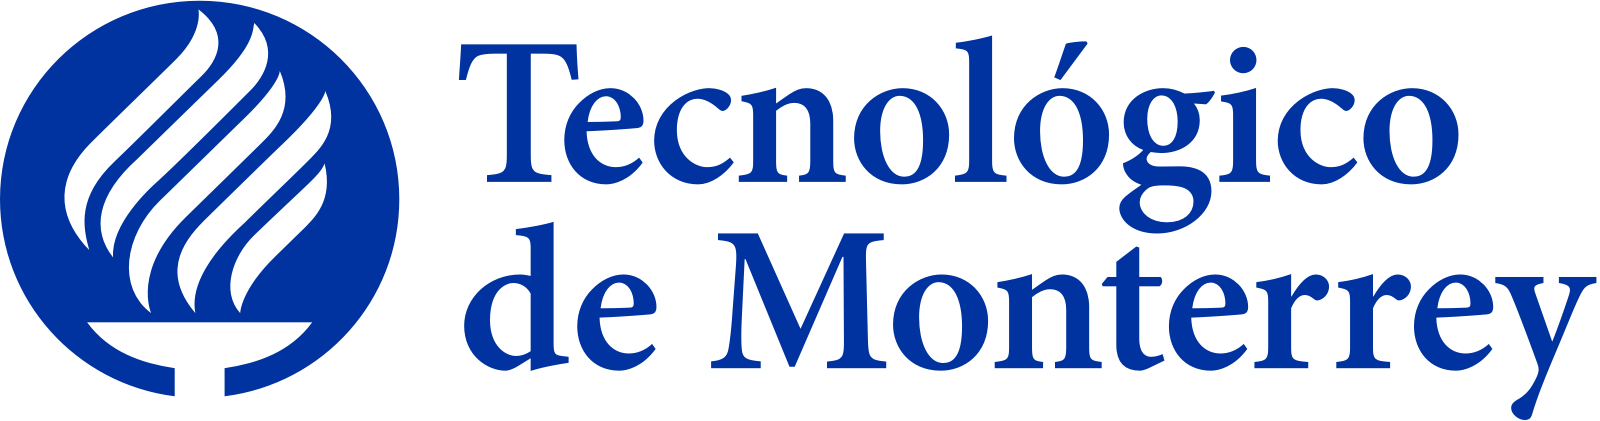

# Maestría en Inteligencia Artificial Aplicada
## TC 5035 Proyecto Integrador
### Tecnológico de Monterrey
### Dra. Grettel Barceló Alonso
### Dr. Luis Eduardo Falcón Morales
### Dr. Jose Antonio Cantoral Ceballos


## **Avance 5. Modelos Final**
## Equipo 19
Integrantes

> - Andrea Carolina Treviño Garza A01034993
> - Jorge Alberto Duarte Salinas  A01793015
> - Manuel Gerardo Licera Aguirre A00947315


**OBJETIVO PROYECTO:** Actualmente la materia prima (tubos cuadrados) se corta de manera estática, es decir, se corta un solo número de parte por materia prima según la cantidad requerida. La intención con nuestro proyecto es cortar diferentes números de parte en la misma materia prima para mejorar el **Aprovechamiento del material** (en columna "aprov_material") o bien reducir el scrap. Por lo que el modelo debe de indicarte cuántos números de parte y en qué orden debes cortarlos en cada materia prima para maximizar el aprovechamiento del material.

Después de trabajar en la fase de preparación de datos y de feature engineerging decidimos acotar la cantidad de materias primas de tubos cuadrados

# **Métodos heurísticos**

En el Modelo heurístico de Bin Packing podemos encontrar diferentes alternativas para solucionar un problema, como parte de encontrar la mejor solución para el objetivo que queremos abordar vamos a hacer una comparativa de algunas de las opciones que tenemos:


*   First Fit: Coloca un nuevo objeto en el contenedor que tenga espacio libre priorizando colocarlo por orden de creación de bines.
*   Best Fit: Coloca un nuevo objeto en el bin que este más lleno en donde haya espacio para acomodarlo.
*   Worst Fit: Coloca un nuevo objeto en el bin que este más vacio.
*   Almost Worst Fit: Coloca un nuevo objeto en el segundo contenedor más vacío.




In [1]:
#Definición de Funciones para Comparación de bin packing

def first_fit(bin_capacity, items):
    bins = []
    bin_contents = []
    remaining_space = [bin_capacity]  # Initialize with full bin capacity
    material_utilization = [0]  # Initialize with zero utilization
    for item in items:
        # Check if the item fits in any existing bin
        for i in range(len(bins)):
            if bins[i] + item <= bin_capacity:
                bins[i] += item
                bin_contents[i].append(item)
                break
        else:
            # If the item doesn't fit in any existing bin, create a new bin
            bins.append(item)
            bin_contents.append([item])
    return len(bins), bin_contents

def best_fit(bin_capacity, items):
    bins = []
    bin_contents = []
    remaining_space = [bin_capacity]  # Initialize with full bin capacity
    material_utilization = [0]  # Initialize with zero utilization
    for item in items:
        min_space = bin_capacity + 1
        best_bin_index = -1
        for i in range(len(bins)):
            space_left = bin_capacity - bins[i]
            if item <= space_left < min_space:
                min_space = space_left
                best_bin_index = i
        if best_bin_index != -1:
            bins[best_bin_index] += item
            bin_contents[best_bin_index].append(item)
        else:
            bins.append(item)
            bin_contents.append([item])
    return len(bins), bin_contents

def worst_fit(bin_capacity, items):
    bins = [0]  # Initialize with one empty bin
    bin_contents = [[]]  # Initialize with empty bin contents
    remaining_space = [bin_capacity]  # Initialize with full bin capacity
    material_utilization = [0]  # Initialize with zero utilization
    for item in items:
        max_space_index = -1
        max_space = -1
        # Find the bin with the most remaining space
        for i in range(len(bins)):
            if bins[i] + item <= bin_capacity and bin_capacity - (bins[i] + item) > max_space:
                max_space_index = i
                max_space = bin_capacity - (bins[i] + item)
        if max_space_index != -1:
            # If there's a bin with enough space, place the item in it
            bins[max_space_index] += item
            bin_contents[max_space_index].append(item)
        else:
            # If no bin has enough space, create a new bin
            bins.append(item)
            bin_contents.append([item])
    return len(bins), bin_contents

def almost_worst_fit(bin_capacity, items):
    bins = [0]  # Initialize with one empty bin
    bin_contents = [[]]  # Initialize with empty bin contents
    remaining_space = [bin_capacity]  # Initialize with full bin capacity
    material_utilization = [0]  # Initialize with zero utilization
    for item in items:
        max_space_index = -1
        max_space = -1
        second_max_space_index = -1
        second_max_space = -1
        # Find the bin with the most remaining space
        for i in range(len(bins)):
            if bins[i] + item <= bin_capacity:
                space_left = bin_capacity - (bins[i] + item)
                if space_left > max_space:
                    second_max_space = max_space
                    second_max_space_index = max_space_index
                    max_space = space_left
                    max_space_index = i
                elif space_left > second_max_space:
                    second_max_space = space_left
                    second_max_space_index = i
        if max_space_index != -1:
            # If there's a bin with enough space, place the item in it
            bins[max_space_index] += item
            bin_contents[max_space_index].append(item)
        elif second_max_space_index != -1:
            bins[second_max_space_index] += item
            bin_contents[second_max_space_index].append(item)
        else:
            # If no bin has enough space, create a new bin
            bins.append(item)
            bin_contents.append([item])
    return len(bins), bin_contents


In [2]:
if __name__ == "__main__":
    # Example usage
    bin_capacity = 20  # Capacity of the tubular steel
    items = [3, 4, 5, 2, 7, 1, 8, 4, 6]

    print("First Fit:")
    num_bins_first, bin_contents_first = first_fit(bin_capacity, items)
    print("Number of bins needed:", num_bins_first)
    print("Bin contents:")
    for i, contents in enumerate(bin_contents_first):
        total_sum = sum(contents)
        print("Bin", i+1, ":", contents,"Aprovechamiento de bin", total_sum / bin_capacity)

    print("\nBest Fit:")
    num_bins_best, bin_contents_best = best_fit(bin_capacity, items)
    print("Number of bins needed:", num_bins_best)
    print("Bin contents:")
    for i, contents in enumerate(bin_contents_best):
        total_sum = sum(contents)
        print("Bin", i+1, ":", contents,"Aprovechamiento de bin", total_sum / bin_capacity)

    print("\nWorst Fit:")
    num_bins_worst, bin_contents_worst = worst_fit(bin_capacity, items)
    print("Number of bins needed:", num_bins_worst)
    print("Bin contents:")
    for i, contents in enumerate(bin_contents_worst):
        total_sum = sum(contents)
        print("Bin", i+1, ":", contents,"Aprovechamiento de bin", total_sum / bin_capacity)

    print("\nAlmost Worst Fit:")
    num_bins_almost_worst, bin_contents_almost_worst = almost_worst_fit(bin_capacity, items)
    print("Number of bins needed:", num_bins_almost_worst)
    print("Bin contents:")
    for i, contents in enumerate(bin_contents_almost_worst):
        total_sum = sum(contents)
        print("Bin", i+1, ":", contents,"Aprovechamiento de bin", total_sum / bin_capacity)

First Fit:
Number of bins needed: 3
Bin contents:
Bin 1 : [3, 4, 5, 2, 1, 4] Aprovechamiento de bin 0.95
Bin 2 : [7, 8] Aprovechamiento de bin 0.75
Bin 3 : [6] Aprovechamiento de bin 0.3

Best Fit:
Number of bins needed: 3
Bin contents:
Bin 1 : [3, 4, 5, 2, 1, 4] Aprovechamiento de bin 0.95
Bin 2 : [7, 8] Aprovechamiento de bin 0.75
Bin 3 : [6] Aprovechamiento de bin 0.3

Worst Fit:
Number of bins needed: 3
Bin contents:
Bin 1 : [3, 4, 5, 2, 4] Aprovechamiento de bin 0.9
Bin 2 : [7, 1, 8] Aprovechamiento de bin 0.8
Bin 3 : [6] Aprovechamiento de bin 0.3

Almost Worst Fit:
Number of bins needed: 3
Bin contents:
Bin 1 : [3, 4, 5, 2, 4] Aprovechamiento de bin 0.9
Bin 2 : [7, 1, 8] Aprovechamiento de bin 0.8
Bin 3 : [6] Aprovechamiento de bin 0.3


In [3]:
if __name__ == "__main__":
    # Example usage
    bin_capacity = 240 # Capacity of the tubular steel
    items = [36.923, 36.923, 36.923, 36.923, 36.923, 36.923, 36.923, 36.923, 36.923, 36.923, 36.923, 6.25, 6.25, 6.25, 6.25, 6.25, 63.346, 63.346, 63.346, 75.118, 75.118, 75.118, 75.118, 75.118, 75.118, 75.118, 75.118, 75.118, 93.858, 93.858, 93.858, 93.858, 93.858, 93.858, 3.543, 19.685, 19.685, 19.685, 19.685, 19.685, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 15.551, 11.164, 11.164, 11.164]  # Lengths of the pieces to be cut


    print("First Fit:")
    num_bins_first, bin_contents_first = first_fit(bin_capacity, items)
    print("Number of bins needed:", num_bins_first)
    print("Bin contents:")
    for i, contents in enumerate(bin_contents_first):
        total_sum = sum(contents)
        print("Bin", i+1, ":", contents,"Aprovechamiento de bin", total_sum / bin_capacity)

    print("\nBest Fit:")
    num_bins_best, bin_contents_best = best_fit(bin_capacity, items)
    print("Number of bins needed:", num_bins_best)
    print("Bin contents:")
    for i, contents in enumerate(bin_contents_best):
        total_sum = sum(contents)
        print("Bin", i+1, ":", contents,"Aprovechamiento de bin", total_sum / bin_capacity)

    print("\nWorst Fit:")
    num_bins_worst, bin_contents_worst = worst_fit(bin_capacity, items)
    print("Number of bins needed:", num_bins_worst)
    print("Bin contents:")
    for i, contents in enumerate(bin_contents_worst):
        total_sum = sum(contents)
        print("Bin", i+1, ":", contents,"Aprovechamiento de bin", total_sum / bin_capacity)

    print("\nAlmost Worst Fit:")
    num_bins_almost_worst, bin_contents_almost_worst = almost_worst_fit(bin_capacity, items)
    print("Number of bins needed:", num_bins_almost_worst)
    print("Bin contents:")
    for i, contents in enumerate(bin_contents_almost_worst):
        total_sum = sum(contents)
        print("Bin", i+1, ":", contents,"Aprovechamiento de bin", total_sum / bin_capacity)

First Fit:
Number of bins needed: 11
Bin contents:
Bin 1 : [36.923, 36.923, 36.923, 36.923, 36.923, 36.923, 6.25, 6.25, 3.543] Aprovechamiento de bin 0.9899208333333334
Bin 2 : [36.923, 36.923, 36.923, 36.923, 36.923, 6.25, 6.25, 6.25, 19.685, 12.205] Aprovechamiento de bin 0.9802291666666668
Bin 3 : [63.346, 63.346, 63.346, 19.685, 19.685] Aprovechamiento de bin 0.9558666666666666
Bin 4 : [75.118, 75.118, 75.118, 12.205] Aprovechamiento de bin 0.9898291666666666
Bin 5 : [75.118, 75.118, 75.118, 12.205] Aprovechamiento de bin 0.9898291666666666
Bin 6 : [75.118, 75.118, 75.118, 12.205] Aprovechamiento de bin 0.9898291666666666
Bin 7 : [93.858, 93.858, 19.685, 19.685, 12.205] Aprovechamiento de bin 0.9970458333333334
Bin 8 : [93.858, 93.858, 12.205, 12.205, 12.205, 12.205] Aprovechamiento de bin 0.9855666666666669
Bin 9 : [93.858, 93.858, 12.205, 12.205, 12.205, 12.205] Aprovechamiento de bin 0.9855666666666669
Bin 10 : [12.205, 12.205, 12.205, 12.205, 12.205, 12.205, 15.551, 15.551, 15.

Si analizamos los resultados podemos observar que los modelos de First Fit y Best Fit se enfocan en aprovechar la mayoir cantidad de material posible en las materias primas que ya estan por llenarse y en el caso de Worst Fit y Almost Worst Fit al final sobra menos material lo cual limita las opciones para un futuro corte de alguna necesidad adicional.

Con esta comparativa concluimos que para nuestro contexto sería mejor utilizar el First Fit o el Best Fit, en base al contexto de nuestro problema podemos concluir que el modelo Best Fit sería ideal para atender el objetivo de tener un mayor aprovechamiento de materia prima.

En base a las pruebas que hemos realizado con diferentes algoritmos vemos que el mejor acercamiento que podríamos tener para resolver el problema es correr varios modelos en paralelo y hacer una selección en base a los que consigan un mayor aprovechamiento de material y que consiga maximizar el material que queda en la ultima materia prima para utilizar con alguna pieza adicional.

# **Modelos de Optimización Analizados**

Los modelos de optimización con los que hemos trabajado para resolver esta problemática son:
- MODELO 1: Cutting Stock - Maximizando la longitud cortada del 1ero al penultimo tubo y minizandola para el último.
- MODELO 2: Cutting Stock - Minimizando el total de materias primas.
- MODELO 3: Bin Packing


In [ ]:
# Comenzamos instalando las librerías para plantear problemas de programación lineal:
!pip install ortools
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 37.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [ ]:
# Para comenzar el análisis primeramente importamos algunas librerías requeridas para analizar nuestros datos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
import pulp
import statistics
from ortools.linear_solver import pywraplp

In [ ]:
# Aquí podemos observar los datos de las 3 materia prima seleccionada, sus dimensiones y los números de parte que es posible manufacturar/cortar de ellas:
df = pd.read_csv("datos_avance3_proyecto_integrador.csv", encoding = 'latin-1')
df

,mat_prima,espesor,longitud,peso_kg_cal,num_parte,familia,longitud_man,kg_man,tiempo_1pzaMIN,dem_diaria1,dem_diaria2,dem_diaria3,aprov_material
0,2,0.375,337,154.477641,1,1,72.299,33.141281,3.7500,15,2,0,0.858151
1,2,0.375,337,154.477641,11,1,61.024,27.972656,3.7500,12,5,2,0.905395
2,2,0.375,337,154.477641,18,1,42.953,19.689141,1.5000,14,13,12,0.892194
3,2,0.375,337,154.477641,17,1,59.756,27.391547,3.0000,10,12,12,0.886586
4,2,0.375,337,154.477641,16,4,89.488,41.020547,2.5860,0,1,0,0.796631
5,1,0.250,240,28.575000,15,5,36.923,4.396154,3.0000,11,13,9,0.923077
6,1,0.250,240,28.575000,14,6,6.250,0.744141,0.1800,5,2,1,0.989583
7,1,0.250,240,28.575000,13,7,63.346,7.542187,1.2120,3,1,11,0.791831
8,1,0.250,240,28.575000,12,8,75.118,8.943750,1.2120,9,6,3,0.938976
9,1,0.250,240,28.575000,10,9,93.858,11.175000,1.2840,6,7,12,0.782152


# **MODELO OPTIMIZACIÓN 1 - Cutting Stock Problem:** Maximizando longitud cortada desde 1era a penultima materia prima y minimizando para la última

In [ ]:
# Lista de valores de materias primas:
mat_prima_values = [1, 2, 3]

# Definición de diccionario para guardar las listas de partes:
list_parts = {}

# Iteraración de los valores de "mat_prima_values" y generación dinámica de listas
for mat_prima_selec in mat_prima_values:
    part_lengths = df[df['mat_prima'] == mat_prima_selec]
    matrix_parts = part_lengths['longitud_man'].values
    list_parts[f"list_parts{mat_prima_selec}"] = matrix_parts.tolist()

# Imprime las listas:
for key, value in list_parts.items():
    print(key + ":", value)

list_parts1: [36.923, 6.25, 63.346, 75.118, 93.858, 3.543, 19.685, 12.205, 15.551, 11.164]
list_parts2: [72.299, 61.024, 42.953, 59.756, 89.488]
list_parts3: [127.953, 59.055, 137.795, 98.425]


In [ ]:
list_parts1 = list_parts['list_parts1']
list_parts2 = list_parts['list_parts2']
list_parts3 = list_parts['list_parts3']

In [ ]:
# Define the list of mat_prima_selec values
mat_prima_values = [1, 2, 3]

# Define the suffixes
suffixes = ["m1", "m2", "m3"]

# Define a dictionary to store the lists
list_dem = {}

# Iterate over mat_prima_values and suffixes to generate lists dynamically
for mat_prima_selec in mat_prima_values:
    part_dem = df[df['mat_prima'] == mat_prima_selec]
    for suffix in suffixes:
        matrix_dem = part_dem[f'dem_diaria{suffix[-1]}'].values
        list_dem[f'list_mat{mat_prima_selec}_de{suffix}'] = matrix_dem.tolist()

# Print the lists
for key, value in list_dem.items():
    print(key + ":", value)

list_mat1_dem1: [11, 5, 3, 9, 6, 1, 5, 19, 16, 3]
list_mat1_dem2: [13, 2, 1, 6, 7, 3, 10, 15, 9, 5]
list_mat1_dem3: [9, 1, 11, 3, 12, 8, 4, 3, 5, 2]
list_mat2_dem1: [15, 12, 14, 10, 0]
list_mat2_dem2: [2, 5, 13, 12, 1]
list_mat2_dem3: [0, 2, 12, 12, 0]
list_mat3_dem1: [9, 3, 7, 1]
list_mat3_dem2: [5, 1, 12, 2]
list_mat3_dem3: [10, 1, 15, 1]


In [ ]:
#Para llamar listas:
list_mat1_dem1 = list_dem['list_mat1_dem1']
list_mat1_dem2 = list_dem['list_mat1_dem2']
list_mat1_dem3 = list_dem['list_mat1_dem3']
list_mat2_dem1 = list_dem['list_mat2_dem1']
list_mat2_dem2 = list_dem['list_mat2_dem2']
list_mat2_dem3 = list_dem['list_mat2_dem3']
list_mat3_dem1 = list_dem['list_mat3_dem1']
list_mat3_dem2 = list_dem['list_mat3_dem2']
list_mat3_dem3 = list_dem['list_mat3_dem3']

In [ ]:
# Define the list of mat_prima_selec values
mat_prima_values = [1, 2, 3]

# Define the suffixes
suffixes = ["m1", "m2", "m3"]

# Define a dictionary to store the lists
mat_prima_long_d = {}

# Iterate over mat_prima_values and suffixes to generate lists dynamically
for mat_prima_selec in mat_prima_values:
    mat_length = df[df['mat_prima'] == mat_prima_selec]['longitud'].values[0]

    for suffix in suffixes:
        list_parts_key = f"list_parts{mat_prima_selec}"
        list_dem_key = f"list_mat{mat_prima_selec}_de{suffix}"
        list_parts = locals()[list_parts_key]
        list_dem = locals()[list_dem_key]

        sum_parts_dem = np.sum(np.array(list_parts) * np.array(list_dem))
        qty_mat_dem = math.ceil(sum_parts_dem / mat_length)

        mat_prima_long_d_key = f"mat_prima{mat_prima_selec}_long_d{suffix[-1]}"
        mat_prima_long_d[mat_prima_long_d_key] = [mat_length] * qty_mat_dem

# Print the lists
for key, value in mat_prima_long_d.items():
    print(key + ":", value)

mat_prima1_long_d1: [240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]
mat_prima1_long_d2: [240, 240, 240, 240, 240, 240, 240, 240, 240, 240]
mat_prima1_long_d3: [240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]
mat_prima2_long_d1: [337, 337, 337, 337, 337, 337, 337, 337, 337]
mat_prima2_long_d2: [337, 337, 337, 337, 337, 337]
mat_prima2_long_d3: [337, 337, 337, 337, 337]
mat_prima3_long_d1: [416, 416, 416, 416, 416, 416]
mat_prima3_long_d2: [416, 416, 416, 416, 416, 416, 416]
mat_prima3_long_d3: [416, 416, 416, 416, 416, 416, 416, 416, 416]


In [ ]:
mat_prima1_long_d1 = mat_prima_long_d['mat_prima1_long_d1']
mat_prima1_long_d2 = mat_prima_long_d['mat_prima1_long_d2']
mat_prima1_long_d3 = mat_prima_long_d['mat_prima1_long_d3']
mat_prima2_long_d1 = mat_prima_long_d['mat_prima2_long_d1']
mat_prima2_long_d2 = mat_prima_long_d['mat_prima2_long_d2']
mat_prima2_long_d3 = mat_prima_long_d['mat_prima2_long_d3']
mat_prima3_long_d1 = mat_prima_long_d['mat_prima3_long_d1']
mat_prima3_long_d2 = mat_prima_long_d['mat_prima3_long_d2']
mat_prima3_long_d3 = mat_prima_long_d['mat_prima3_long_d3']

In [ ]:
def solve_cutting_stock(raw_material_length, part_lengths, part_demands):
    # Create a linear programming problem
    problem = pulp.LpProblem("CuttingStockProblem", pulp.LpMaximize)

    # Define decision variables as integers
    x = {}
    material_yield_results = []  # List to store material yield results
    for i in range(len(part_lengths)):
        for j in range(len(raw_material_length)):
            x[(i, j)] = pulp.LpVariable(f"x_{i}_{j}", cat=pulp.LpInteger, lowBound=0)

    # Objective function: maximize the total length used for the first raw material tubes without the last one
    for j in range(len(raw_material_length) - 1):
        problem += pulp.lpSum(x[(i, j)] * part_lengths[i] for i in range(len(part_lengths)))

    # Objective function: minimize the total length used for the last raw material tube
    problem += -pulp.lpSum(x[(i, len(raw_material_length) - 1)] * part_lengths[i] for i in range(len(part_lengths)))

    # Constraints: meet the daily demand for each part
    for i in range(len(part_lengths)):
        problem += pulp.lpSum(x[(i, j)] for j in range(len(raw_material_length))) == part_demands[i]

    # Constraints: use each raw material efficiently
    for j in range(len(raw_material_length)):
        problem += pulp.lpSum(x[(i, j)] * part_lengths[i] for i in range(len(part_lengths))) <= raw_material_length[j]

    # Solve the problem
    problem.solve()

    # Display the solution in a tabular format
    print("Optimal Cutting Plan:")
    print("-" * 76)
    print("|  Part No. | Raw Material | Units Cut | Total Length Used| Material Yield |")
    print("|-----------|--------------|-----------|------------------|----------------|")
    for j in range(len(raw_material_length)):
        total_length_used = 0
        for i in range(len(part_lengths)):
            units_cut = int(x[(i, j)].varValue)
            if units_cut > 0:
                total_length_used += units_cut * part_lengths[i]
                material_yield = total_length_used / raw_material_length[j]
                material_yield_results.append(material_yield)  # Add material yield to the list
                print(f"| {i+1:9} | {j+1:12} | {units_cut:9} | {total_length_used:16.2f} | {material_yield:14.2f} |")
        print("|-----------|--------------|-----------|------------------|----------------|")

    return material_yield_results


In [ ]:
# Ejemplo de resultado utilizando la materia prima 1 (mat_prima_1) y la demanda diaria 1 (dem_diaria1)
raw_material_length = [240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]
part_lengths = list_parts1
part_demands = list_mat1_dem1

material_yield_m1_d1 = solve_cutting_stock(raw_material_length, part_lengths, part_demands)

Optimal Cutting Plan:
----------------------------------------------------------------------------
|  Part No. | Raw Material | Units Cut | Total Length Used| Material Yield |
|-----------|--------------|-----------|------------------|----------------|
|         4 |            1 |         3 |           225.35 |           0.94 |
|-----------|--------------|-----------|------------------|----------------|
|         1 |            2 |         5 |           184.62 |           0.77 |
|         6 |            2 |         1 |           188.16 |           0.78 |
|         7 |            2 |         2 |           227.53 |           0.95 |
|-----------|--------------|-----------|------------------|----------------|
|         1 |            3 |         6 |           221.54 |           0.92 |
|-----------|--------------|-----------|------------------|----------------|
|         4 |            4 |         3 |           225.35 |           0.94 |
|-----------|--------------|-----------|--------------

# **MODELO OPTIMIZACIÓN 1 - Cutting Stock Problem:** Minimizando cantidad total de materias primas utilizadas.

In [ ]:
def cutting_stock(parts, demands, stock_length, num_rolls):
    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Variables
    x = []
    for i in range(len(parts)):
        x.append([])
        for j in range(num_rolls):
            x[i].append(solver.IntVar(0, solver.infinity(), 'x[%i][%i]' % (i, j)))

    # Constraints
    for i in range(len(parts)):
        solver.Add(sum(x[i][j] for j in range(num_rolls)) >= demands[i])

    for j in range(num_rolls):
        solver.Add(sum(x[i][j] * parts[i] for i in range(len(parts))) <= stock_length)

    # Objective function (Minimize the number of rolls)
    solver.Minimize(solver.Sum(x[i][j] for i in range(len(parts)) for j in range(num_rolls)))

    # Solve
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        results = []
        for i in range(len(parts)):
            for j in range(num_rolls):
                total_length_used = x[i][j].solution_value() * parts[i]
                utilization_percentage = (total_length_used / stock_length) * 100
                wastage_percentage = 100 - utilization_percentage

                if utilization_percentage > 0:
                    results.append((i+1, j+1, x[i][j].solution_value(), total_length_used, utilization_percentage))

        # Sort results by Raw Material (Roll Number)
        results.sort(key=lambda x: x[1])

        # Calculate the maximum width for each column
        max_widths = [max(len(str(item)) for item in column) for column in zip(*results)]
        # Adjust for column titles
        column_titles = ['Part No.', 'Raw Material', 'Units Cut', 'Total Length Used', 'Material Yield']
        max_widths_titles = [max(len(title), max_widths[i]) for i, title in enumerate(column_titles)]

        # Print the table with formatted columns
        print("| Part No. | Raw Material | Units Cut | Total Length Used | Material Yield |")
        # print('|', '-' * (max_widths_titles[0] + 2), '|', '-' * (max_widths_titles[1] + 2), '|', '-' * (max_widths_titles[2] + 2), '|', '-' * (max_widths_titles[3] + 2), '|', '-' * (max_widths_titles[4] + 2), '|')
        for result in results:
            print('|', str(result[0]).ljust(max_widths[0]), '|', str(result[1]).ljust(max_widths[1]), '|', str(result[2]).ljust(max_widths[2]), '|', '{:.2f}'.format(result[3]).ljust(max_widths[3]), '|', '{:.2f}%'.format(result[4]).ljust(max_widths[4]), '|')
    else:
        print('The problem does not have an optimal solution.')

In [ ]:
# Materia Prima 1 - Demanda diaria 1:
# Longitudes de las piezas
parts = list_parts1

# Demanda de cada tipo de parte
demands = list_mat1_dem1

# Longitud total de la materia prima
stock_length = 240

# Número de materia prima a utilizar
num_rolls = 11

# Resolver el problema
cutting_stock(part_lengths, demands, stock_length, num_rolls)

| Part No. | Raw Material | Units Cut | Total Length Used | Material Yield |
| 2  | 1  | 5.0  | 31.25              | 13.02%             |
| 5  | 1  | 1.0  | 93.86              | 39.11%             |
| 8  | 1  | 5.0  | 61.02              | 25.43%             |
| 9  | 1  | 1.0  | 15.55              | 6.48%              |
| 10 | 1  | 3.0  | 33.49              | 13.95%             |
| 4  | 2  | 3.0  | 225.35             | 93.90%             |
| 3  | 3  | 1.0  | 63.35              | 26.39%             |
| 8  | 3  | 14.0 | 170.87             | 71.20%             |
| 6  | 4  | 1.0  | 3.54               | 1.48%              |
| 9  | 4  | 15.0 | 233.27             | 97.19%             |
| 1  | 5  | 3.0  | 110.77             | 46.15%             |
| 5  | 5  | 1.0  | 93.86              | 39.11%             |
| 1  | 6  | 1.0  | 36.92              | 15.38%             |
| 5  | 6  | 2.0  | 187.72             | 78.22%             |
| 1  | 7  | 6.0  | 221.54             | 92.31%             |
| 1  | 8

# **MODELO OPTIMIZACIÓN 3 - Bin Packing:**

In [ ]:
class Tube:
    def __init__(self, length):
        self.length = length

def bin_packing_for_steel(tube_lengths, demands, bin_length):
    # Create tubes from lengths and demands
    tubes = [Tube(length) for length in tube_lengths for _ in range(demands[tube_lengths.index(length)])]

    # Sort tubes by length in descending order
    tubes.sort(key=lambda x: x.length, reverse=True)

    # Initialize the list of bins
    bins = []

    for tube in tubes:
        # Try to place the tubes in an existing bin
        packed = False
        for bin in bins:
            if bin["remaining_length"] >= tube.length:
                # Place the tubes inside the bin
                bin["tubes"].append(tube)
                bin["remaining_length"] -= tube.length
                packed = True
                break

        # If the tube cannot be packed into an existing bin, create a new one
        if not packed:
            new_bin = {
                "tubes": [tube],
                "remaining_length": bin_length - tube.length,
            }
            bins.append(new_bin)

    return bins

def display_results_in_tabular_format(tube_lengths, demands, bin_length):
    bins = bin_packing_for_steel(tube_lengths, demands, bin_length)
    prev_raw_material = None

    # Calculate maximum width for each column
    max_widths = [10, 12, 9, 18, 15]  # Adjust according to your data

    # Print header
    print('--------------------------------------------------------------------------------')
    print('|  Part No.  | Raw Material | Units Cut | Total Length Used  |  Material Yield |')
    print('|------------|--------------|-----------|--------------------|-----------------|')

    for i, bin in enumerate(bins):
        units_cut = {}
        for tube in bin["tubes"]:
            length = tube.length
            if length not in units_cut:
                units_cut[length] = 1
            else:
                units_cut[length] += 1

        # Print line of "---" if it's a new raw material
        if prev_raw_material is not None and i != prev_raw_material:
            print('|------------|--------------|-----------|--------------------|-----------------|')

        for length, count in units_cut.items():
            total_length_used = count * length
            material_yield = (total_length_used / bin_length) * 100

            # Pad values to ensure equal width
            part_no = str(tube_lengths.index(length)+1).ljust(max_widths[0])
            raw_material = str(i+1).ljust(max_widths[1])
            units_cut_str = str(count).ljust(max_widths[2])
            total_length_used_str = f'{total_length_used:.3f}'.ljust(max_widths[3])
            material_yield_str = f'{material_yield:.2f}%'.ljust(max_widths[4])

            print(f'| {part_no} | {raw_material} | {units_cut_str} | {total_length_used_str} | {material_yield_str} |')

        prev_raw_material = i

    print('--------------------------------------------------------------------------------')

In [ ]:
# Materia Prima 1 - Demanda diaria 1:
tube_lengths = list_parts1  # List of tube lengths
demands = list_mat1_dem1  # Demand for each tube length
bin_length = 240  # Length of the bin

display_results_in_tabular_format(tube_lengths, demands, bin_length)

--------------------------------------------------------------------------------
|  Part No.  | Raw Material | Units Cut | Total Length Used  |  Material Yield |
|------------|--------------|-----------|--------------------|-----------------|
| 5          | 1            | 2         | 187.716            | 78.22%          |
| 1          | 1            | 1         | 36.923             | 15.38%          |
| 8          | 1            | 1         | 12.205             | 5.09%           |
|------------|--------------|-----------|--------------------|-----------------|
| 5          | 2            | 2         | 187.716            | 78.22%          |
| 1          | 2            | 1         | 36.923             | 15.38%          |
| 8          | 2            | 1         | 12.205             | 5.09%           |
|------------|--------------|-----------|--------------------|-----------------|
| 5          | 3            | 2         | 187.716            | 78.22%          |
| 1          | 3            

# **Algoritmo de Corte de stock óptimo**


El problema de corte de stock es un problema de optimización combinatoria que implica cortar piezas más pequeñas a partir de piezas más grandes de manera eficiente para satisfacer la demanda. Se trata de maximizar la cantidad de piezas cortadas utilizando la menor cantidad posible de materia prima (rollos).

OR-Tools es una biblioteca de optimización desarrollada por Google. Proporciona un conjunto de herramientas para resolver problemas de optimización combinatoria, lineal y no lineal. En el contexto del corte de stock, se utiliza para resolver problemas de programación lineal entera.

### **Materia Prima 1 - Demanda diaria 1**


### **Materia Prima 1 - Demanda diaria 3**

In [ ]:
if __name__ == '__main__':
    # Longitudes de las piezas
    part_lengths = [36.923,6.25,63.346,75.118,93.858,3.543,19.685,12.205,15.551,11.164]

    # Demanda de cada tipo de parte
    demands = [9,1,11,3,12,8,4,3,5,2]

    # Longitud total de la materia prima
    stock_length = 240

    # Número de materia prima a utilizar
    num_rolls = 11

    # Resolver el problema
    cutting_stock(part_lengths, demands, stock_length, num_rolls)

Solution:
Roll 0:
  Part 2: 1 pieces
  Part 3: 1 pieces
  Part 4: 1 pieces
  Part 5: 2 pieces
  Utilization: 99.75%
  Wastage: 0.25%
Roll 1:
  Part 0: 1 pieces
  Part 2: 3 pieces
  Part 9: 1 pieces
  Utilization: 99.22%
  Wastage: 0.78%
Roll 2:
  Part 4: 2 pieces
  Part 6: 1 pieces
  Part 8: 2 pieces
  Utilization: 99.38%
  Wastage: 0.62%
Roll 3:
  Part 2: 2 pieces
  Part 4: 1 pieces
  Part 5: 1 pieces
  Part 8: 1 pieces
  Utilization: 99.85%
  Wastage: 0.15%
Roll 4:
  Part 4: 2 pieces
  Part 5: 1 pieces
  Part 6: 1 pieces
  Part 7: 1 pieces
  Part 8: 1 pieces
  Utilization: 99.46%
  Wastage: 0.54%
Roll 5:
  Part 0: 1 pieces
  Part 2: 2 pieces
  Part 3: 1 pieces
  Utilization: 99.47%
  Wastage: 0.53%
Roll 6:
  Part 0: 1 pieces
  Part 4: 2 pieces
  Part 5: 1 pieces
  Part 9: 1 pieces
  Utilization: 99.73%
  Wastage: 0.27%
Roll 7:
  Part 4: 2 pieces
  Part 6: 2 pieces
  Part 7: 1 pieces
  Utilization: 99.70%
  Wastage: 0.30%
Roll 8:
  Part 2: 2 pieces
  Part 4: 1 pieces
  Part 5: 1 piece

### **Materia Prima 2 - Demanda diaria 1**


In [ ]:
if __name__ == '__main__':
    # Longitudes de las piezas
    part_lengths = [72.29,61.024,42.953,59.756,89.488]

    # Demanda de cada tipo de parte
    demands = [15,12,14,10,0]

    # Longitud total de la materia prima
    stock_length = 337

    # Número de materia prima a utilizar
    num_rolls = 9

    # Resolver el problema
    cutting_stock(part_lengths, demands, stock_length, num_rolls)

Solution:
Roll 0:
  Part 0: 3 pieces
  Part 3: 2 pieces
  Utilization: 99.82%
  Wastage: 0.18%
Roll 1:
  Part 0: 3 pieces
  Part 3: 2 pieces
  Utilization: 99.82%
  Wastage: 0.18%
Roll 2:
  Part 0: 3 pieces
  Part 3: 2 pieces
  Utilization: 99.82%
  Wastage: 0.18%
Roll 3:
  Part 1: 2 pieces
  Part 2: 5 pieces
  Utilization: 99.94%
  Wastage: 0.06%
Roll 4:
  Part 0: 3 pieces
  Part 3: 2 pieces
  Utilization: 99.82%
  Wastage: 0.18%
Roll 5:
  Part 1: 4 pieces
  Part 2: 2 pieces
  Utilization: 97.92%
  Wastage: 2.08%
Roll 6:
  Part 1: 2 pieces
  Part 2: 5 pieces
  Utilization: 99.94%
  Wastage: 0.06%
Roll 7:
  Part 1: 4 pieces
  Part 2: 2 pieces
  Utilization: 97.92%
  Wastage: 2.08%
Roll 8:
  Part 0: 3 pieces
  Part 3: 2 pieces
  Utilization: 99.82%
  Wastage: 0.18%


### **Materia Prima 3 - Demanda diaria 2**

In [ ]:
if __name__ == '__main__':
    # Longitudes de las piezas
    part_lengths = [127.953,59.055,137.795,98.425]

    # Demanda de cada tipo de parte
    demands = [5,1,12,2]

    # Longitud total de la materia prima
    stock_length = 416

    # Número de materia prima a utilizar
    num_rolls = 7

    # Resolver el problema
    cutting_stock(part_lengths, demands, stock_length, num_rolls)

Solution:
Roll 0:
  Part 0: 1 pieces
  Part 2: 1 pieces
  Utilization: 63.88%
  Wastage: 36.12%
Roll 1:
  Part 2: 3 pieces
  Utilization: 99.37%
  Wastage: 0.63%
Roll 2:
  Part 0: 2 pieces
  Part 1: 1 pieces
  Utilization: 75.71%
  Wastage: 24.29%
Roll 3:
  Part 2: 3 pieces
  Utilization: 99.37%
  Wastage: 0.63%
Roll 4:
  Part 0: 1 pieces
  Part 3: 2 pieces
  Utilization: 78.08%
  Wastage: 21.92%
Roll 5:
  Part 2: 3 pieces
  Utilization: 99.37%
  Wastage: 0.63%
Roll 6:
  Part 0: 1 pieces
  Part 2: 2 pieces
  Utilization: 97.01%
  Wastage: 2.99%


## **Algoritmo Bin Packing**

Al igual que el problema de la mochila, el problema de empaquetado de discretizaciones también implica empaquetar elementos en discretizaciones. Sin embargo, el problema de la compresión tiene un objetivo diferente: encontrar la menor cantidad de contenedores que contendrán todos los elementos.

A continuación, se resumen las diferencias entre ambos problemas:

Problema con la mochila: empaqueta un subconjunto de los elementos en una cantidad fija de discretizaciones, con capacidades de variación variables, de modo que el valor total de los elementos empaquetados sea el máximo.

Problema de empaque: dado que hay tantos contenedores con una capacidad común como sea necesario, encuentra la menor que pueda contener todos los elementos. En este problema, los elementos no tienen valores asignados, ya que el objetivo no implica valor.

Para la validación de resultados se hará una comparación de una demanda que creamos con poca cantidad de piezas y después utilizaremos la información del dataframe de la dema_diaria1 para poder comparar los resultados del porcentaje de aprovechamiento de material comparado contra el corte estático.

Comenzaremos con la comparativa de la demanda que creamos para realizar el ejercicio

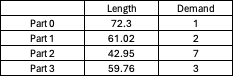

Al hacer la prueba de un corte estático de esta demanda nos da como resultado un aprovechamiento de material de un 91%, esto considerando que el material que queda en el ultimo tubo no se considera como material no utilizado, sino como material que queda para un uso a futuro con otros cortes de tubos.


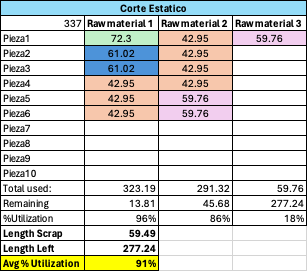

In [ ]:
#Se corre el modelo colocando la demanda de tubos con su longitud
if __name__ == "__main__":
    tubes = [Tube(72.3), Tube(61.02), Tube(61.02), Tube(42.95), Tube(42.95), Tube(42.95), Tube(42.95), Tube(42.95), Tube(42.95), Tube(42.95), Tube(59.76), Tube(59.76), Tube(59.76)]
    bin_length = 337

    packed_bins = bin_packing_for_steel(tubes, bin_length)

    for i, bin in enumerate(packed_bins):
        print(f"Bin {i+1}:")
        for tube in bin["tubes"]:
            print(f"Tube length: {tube.length}")
        print("Remaining space - Length:", bin["remaining_length"])
        print("material_utilization", (bin_length - bin["remaining_length"])/bin_length*100)
        print()

Bin 1:
Tube length: 72.3
Tube length: 61.02
Tube length: 61.02
Tube length: 59.76
Tube length: 59.76
Remaining space - Length: 23.13999999999998
material_utilization 93.13353115727003

Bin 2:
Tube length: 59.76
Tube length: 42.95
Tube length: 42.95
Tube length: 42.95
Tube length: 42.95
Tube length: 42.95
Tube length: 42.95
Remaining space - Length: 19.540000000000035
material_utilization 94.20178041543026

Bin 3:
Tube length: 42.95
Remaining space - Length: 294.05
material_utilization 12.744807121661717



Al visualizar los resultados obtenidos pude observar que con el modelo se logró conseguir un mejor aprovechamiento de las materias primas consiguiendo un 94% de utilización y dejando 294cm en la tercer materia prima para un corte de tubos futuros. Aunque la cantidad de materias primas fue la misma en corte estático, se puede concluir que el aprovechamiento fue mejor.


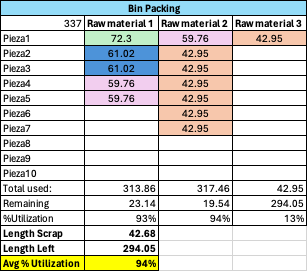

Ahora se hará el ejercicio considerando la materia prima 2 del dataframe que cuenta con una longitud de 337 centímetros y con c5 diferentes numeros de parte que salen de esa materia prima.

Para esta comparativa utilizaremos la demanda diaria 1 "dem_diaria1" por lo que dejaremos se creara un dataframe con la información de input para nuestro modelo:
- Longitud de piezas a cortar
- Cantidad de tubos de la demanda diaria 1

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 33.7 MB/s eta 0:00:00


In [ ]:
#Para comenzar el análisis primeramente importamos algunas librerías requeridas para analizar nuestros datos:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
import pulp
import statistics

In [ ]:
#Aquí podemos observar los primeros 5 renglones de los datos que tenemos de cada materia prima, sus dimensiones y los números de parte que es posible manufacturar/cortar de ellas:
df = pd.read_csv("datos_avance3_proyecto_integrador.csv", encoding = 'latin-1')
df

,mat_prima,espesor,longitud,peso_kg_cal,num_parte,familia,longitud_man,kg_man,tiempo_1pzaMIN,dem_diaria1,dem_diaria2,dem_diaria3,aprov_material
0,2,0.375,337,154.477641,1,1,72.299,33.141281,3.7500,15,2,0,0.858151
1,2,0.375,337,154.477641,11,1,61.024,27.972656,3.7500,12,5,2,0.905395
2,2,0.375,337,154.477641,18,1,42.953,19.689141,1.5000,14,13,12,0.892194
3,2,0.375,337,154.477641,17,1,59.756,27.391547,3.0000,10,12,12,0.886586
4,2,0.375,337,154.477641,16,4,89.488,41.020547,2.5860,0,1,0,0.796631
5,1,0.250,240,28.575000,15,5,36.923,4.396154,3.0000,11,13,9,0.923077
6,1,0.250,240,28.575000,14,6,6.250,0.744141,0.1800,5,2,1,0.989583
7,1,0.250,240,28.575000,13,7,63.346,7.542187,1.2120,3,1,11,0.791831
8,1,0.250,240,28.575000,12,8,75.118,8.943750,1.2120,9,6,3,0.938976
9,1,0.250,240,28.575000,10,9,93.858,11.175000,1.2840,6,7,12,0.782152


In [ ]:
df.head(n=5)

,mat_prima,espesor,longitud,peso_kg_cal,num_parte,familia,longitud_man,kg_man,tiempo_1pzaMIN,dem_diaria1,dem_diaria2,dem_diaria3,aprov_material
0,2,0.375,337,154.477641,1,1,72.299,33.141281,3.750,15,2,0,0.858151
1,2,0.375,337,154.477641,11,1,61.024,27.972656,3.750,12,5,2,0.905395
2,2,0.375,337,154.477641,18,1,42.953,19.689141,1.500,14,13,12,0.892194
3,2,0.375,337,154.477641,17,1,59.756,27.391547,3.000,10,12,12,0.886586
4,2,0.375,337,154.477641,16,4,89.488,41.020547,2.586,0,1,0,0.796631


In [ ]:
df2=df.head(n=5)
df2

,mat_prima,espesor,longitud,peso_kg_cal,num_parte,familia,longitud_man,kg_man,tiempo_1pzaMIN,dem_diaria1,dem_diaria2,dem_diaria3,aprov_material
0,2,0.375,337,154.477641,1,1,72.299,33.141281,3.750,15,2,0,0.858151
1,2,0.375,337,154.477641,11,1,61.024,27.972656,3.750,12,5,2,0.905395
2,2,0.375,337,154.477641,18,1,42.953,19.689141,1.500,14,13,12,0.892194
3,2,0.375,337,154.477641,17,1,59.756,27.391547,3.000,10,12,12,0.886586
4,2,0.375,337,154.477641,16,4,89.488,41.020547,2.586,0,1,0,0.796631


In [ ]:
df3 = df2[['longitud_man', 'dem_diaria1']].copy()
df3

,longitud_man,dem_diaria1
0,72.299,15
1,61.024,12
2,42.953,14
3,59.756,10
4,89.488,0


In [ ]:
values_list = df3['longitud_man'].tolist()
print(values_list)

[72.299, 61.024, 42.953, 59.756, 89.488]


In [ ]:
text_to_add = 'Tube('
text_to_add2 = ')'
df3['longitud_man'] = df3['longitud_man'].apply(lambda x: f"{text_to_add}{x}{text_to_add2}")

print(df3)

   longitud_man  dem_diaria1
0  Tube(72.299)           15
1  Tube(61.024)           12
2  Tube(42.953)           14
3  Tube(59.756)           10
4  Tube(89.488)            0


In [ ]:
values_list = []
for _, row in df3.iterrows():
    values_list.extend([row['longitud_man']] * row['dem_diaria1'])

print(values_list)

['Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(72.299)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(61.024)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(42.953)', 'Tube(59.756)', 'Tube(59.756)', 'Tube(59.756)', 'Tube(59.756)', 'Tube(59.756)', 'Tube(59.756)', 'Tube(59.756)', 'Tube(59.756)', 'Tube(59.756)', 'Tube(59.756)']


In [ ]:
#Se corre el modelo colocando la demanda de tubos con su longitud
if __name__ == "__main__":
    tubes = [Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(72.299), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(61.024), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(42.953), Tube(59.756), Tube(59.756), Tube(59.756), Tube(59.756), Tube(59.756), Tube(59.756), Tube(59.756), Tube(59.756), Tube(59.756), Tube(59.756)]
    bin_length = 337

    packed_bins = bin_packing_for_steel(tubes, bin_length)

    for i, bin in enumerate(packed_bins):
        print(f"Bin {i+1}:")
        for tube in bin["tubes"]:
            print(f"Tube length: {tube.length}")
        print("Remaining space - Length:", bin["remaining_length"])
        print("material_utilization", (bin_length - bin["remaining_length"])/bin_length*100)
        print()

Bin 1:
Tube length: 72.299
Tube length: 72.299
Tube length: 72.299
Tube length: 72.299
Tube length: 42.953
Remaining space - Length: 4.850999999999999
material_utilization 98.56053412462909

Bin 2:
Tube length: 72.299
Tube length: 72.299
Tube length: 72.299
Tube length: 72.299
Tube length: 42.953
Remaining space - Length: 4.850999999999999
material_utilization 98.56053412462909

Bin 3:
Tube length: 72.299
Tube length: 72.299
Tube length: 72.299
Tube length: 72.299
Tube length: 42.953
Remaining space - Length: 4.850999999999999
material_utilization 98.56053412462909

Bin 4:
Tube length: 72.299
Tube length: 72.299
Tube length: 72.299
Tube length: 61.024
Tube length: 42.953
Remaining space - Length: 16.126000000000005
material_utilization 95.21483679525224

Bin 5:
Tube length: 61.024
Tube length: 61.024
Tube length: 61.024
Tube length: 61.024
Tube length: 61.024
Remaining space - Length: 31.879999999999995
material_utilization 90.54005934718101

Bin 6:
Tube length: 61.024
Tube length: 61.

Al hacer el ejercicio de corte de manera estática se obtiene el siguiente resultado:
- Materias primas utilizadas: 11
- Aprovechamiento de material: 88%

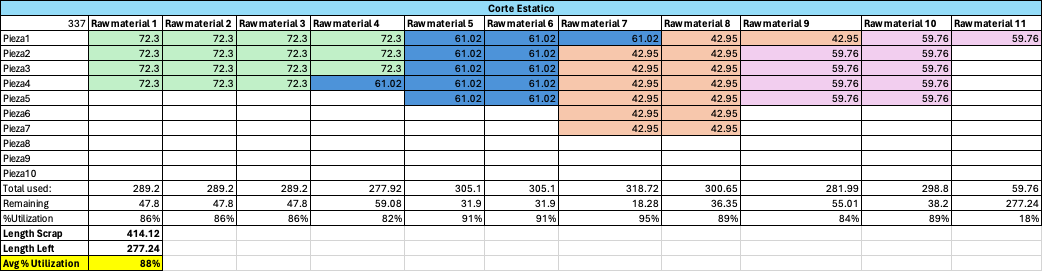

Con los resultados obtenidos del modelo bin packing donde se hace un corte de manera dináica buscando utilizar la mayor cantidad de materia prima posible se obtienen lo siguientes resultados:

- Materias primas utilizadas: 10
- Aprovechamiento de material Promedio: 94%

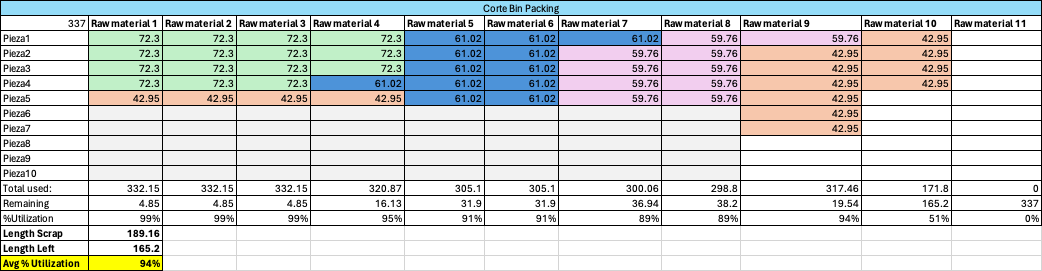

Con este resultado podemos observar que pudimos incrementar la utilización de la materia prima promedio por un 6% lo que nos ahorró el utilizar 1 materia prima adicional como se hace en estático.

A continuación se probarán otros 3 diferentes escenarios para validar resultados
- Materia 1 - dem_diaria1
- Materia 1 - dem_diaria3
- Materia 3 - dem_diaria2

### **Escenario Mat_prima1 - dem_diaria1**

In [ ]:
df4= df.iloc[5:15]
df4

,mat_prima,espesor,longitud,peso_kg_cal,num_parte,familia,longitud_man,kg_man,tiempo_1pzaMIN,dem_diaria1,dem_diaria2,dem_diaria3,aprov_material
5,1,0.25,240,28.575,15,5,36.923,4.396154,3.0000,11,13,9,0.923077
6,1,0.25,240,28.575,14,6,6.250,0.744141,0.1800,5,2,1,0.989583
7,1,0.25,240,28.575,13,7,63.346,7.542187,1.2120,3,1,11,0.791831
8,1,0.25,240,28.575,12,8,75.118,8.943750,1.2120,9,6,3,0.938976
9,1,0.25,240,28.575,10,9,93.858,11.175000,1.2840,6,7,12,0.782152
10,1,0.25,240,28.575,2,10,3.543,0.421875,0.2784,1,3,8,0.989173
11,1,0.25,240,28.575,9,11,19.685,2.343750,0.4848,5,10,4,0.984252
12,1,0.25,240,28.575,8,2,12.205,1.453125,0.6336,19,15,3,0.966207
13,1,0.25,240,28.575,7,3,15.551,1.851562,1.9998,16,9,5,0.971949
14,1,0.25,240,28.575,6,3,11.164,1.329239,3.0000,3,5,2,0.976869


In [ ]:
values_list = df4['longitud_man'].tolist()
text_to_add = 'Tube('
text_to_add2 = ')'
df4['longitud_man'] = df4['longitud_man'].apply(lambda x: f"{text_to_add}{x}{text_to_add2}")
values_list = []
for _, row in df4.iterrows():
    values_list.extend([row['longitud_man']] * row['dem_diaria1'])

print(values_list)

['Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(6.25)', 'Tube(6.25)', 'Tube(6.25)', 'Tube(6.25)', 'Tube(6.25)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(3.543)', 'Tube(19.685)', 'Tube(19.685)', 'Tube(19.685)', 'Tube(19.685)', 'Tube(19.685)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(15.551)', 'Tube(15.551)', 'Tube(15.551)', 'Tube(15.551)', 'T

<ipython-input-20-b1f9d7d9608a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['longitud_man'] = df4['longitud_man'].apply(lambda x: f"{text_to_add}{x}{text_to_add2}")


### **Escenario Mat_prima1 - dem_diaria3**

In [ ]:
df5= df.iloc[5:15]
values_list = df5['longitud_man'].tolist()
text_to_add = 'Tube('
text_to_add2 = ')'
df5['longitud_man'] = df5['longitud_man'].apply(lambda x: f"{text_to_add}{x}{text_to_add2}")
values_list = []
for _, row in df5.iterrows():
    values_list.extend([row['longitud_man']] * row['dem_diaria3'])

print(values_list)

['Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(36.923)', 'Tube(6.25)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(63.346)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(75.118)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(93.858)', 'Tube(3.543)', 'Tube(3.543)', 'Tube(3.543)', 'Tube(3.543)', 'Tube(3.543)', 'Tube(3.543)', 'Tube(3.543)', 'Tube(3.543)', 'Tube(19.685)', 'Tube(19.685)', 'Tube(19.685)', 'Tube(19.685)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(12.205)', 'Tube(15.551)', 'Tube(15.551)', 'Tube(15.551)', 'Tube(15.551)', 'Tube(15.551)', 'Tube(11.164)', 'Tube(11.164)']


<ipython-input-22-41d9154ededb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['longitud_man'] = df5['longitud_man'].apply(lambda x: f"{text_to_add}{x}{text_to_add2}")


In [ ]:
if __name__ == "__main__":
    tubes = [Tube(36.923), Tube(36.923), Tube(36.923), Tube(36.923), Tube(36.923), Tube(36.923), Tube(36.923), Tube(36.923), Tube(36.923), Tube(6.25), Tube(63.346), Tube(63.346), Tube(63.346), Tube(63.346), Tube(63.346), Tube(63.346), Tube(63.346), Tube(63.346), Tube(63.346), Tube(63.346), Tube(63.346), Tube(75.118), Tube(75.118), Tube(75.118), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(93.858), Tube(3.543), Tube(3.543), Tube(3.543), Tube(3.543), Tube(3.543), Tube(3.543), Tube(3.543), Tube(3.543), Tube(19.685), Tube(19.685), Tube(19.685), Tube(19.685), Tube(12.205), Tube(12.205), Tube(12.205), Tube(15.551), Tube(15.551), Tube(15.551), Tube(15.551), Tube(15.551), Tube(11.164), Tube(11.164)]
    bin_length = 240

    packed_bins = bin_packing_for_steel(tubes, bin_length)

    utilization_values = []  # List to store utilization values for each bin

    for i, bin in enumerate(packed_bins):
        print(f"Bin {i+1}:")
        for tube in bin["tubes"]:
            print(f"Tube length: {tube.length}")
        print("Remaining space - Length:", bin["remaining_length"])
        utilization = (bin_length - bin["remaining_length"]) / bin_length * 100
        utilization_values.append(utilization)  # Store utilization value
        print("material_utilization", utilization)
        print()

    # Calculate and print the average material utilization
    if utilization_values:
        average_utilization = sum(utilization_values) / len(utilization_values)
        print("Average material utilization:", average_utilization)
    else:
        print("No bins were packed.")


Bin 1:
Tube length: 93.858
Tube length: 93.858
Tube length: 36.923
Tube length: 12.205
Remaining space - Length: 3.15599999999999
material_utilization 98.68500000000002

Bin 2:
Tube length: 93.858
Tube length: 93.858
Tube length: 36.923
Tube length: 12.205
Remaining space - Length: 3.15599999999999
material_utilization 98.68500000000002

Bin 3:
Tube length: 93.858
Tube length: 93.858
Tube length: 36.923
Tube length: 12.205
Remaining space - Length: 3.15599999999999
material_utilization 98.68500000000002

Bin 4:
Tube length: 93.858
Tube length: 93.858
Tube length: 36.923
Tube length: 11.164
Tube length: 3.543
Remaining space - Length: 0.6539999999999901
material_utilization 99.7275

Bin 5:
Tube length: 93.858
Tube length: 93.858
Tube length: 36.923
Tube length: 11.164
Tube length: 3.543
Remaining space - Length: 0.6539999999999901
material_utilization 99.7275

Bin 6:
Tube length: 93.858
Tube length: 93.858
Tube length: 36.923
Tube length: 6.25
Tube length: 3.543
Tube length: 3.543
Remai

### **Escenario Mat_prima3 - dem_diaria2**

In [ ]:
df6= df.iloc[15:19]
values_list = df6['longitud_man'].tolist()
text_to_add = 'Tube('
text_to_add2 = ')'
df6['longitud_man'] = df6['longitud_man'].apply(lambda x: f"{text_to_add}{x}{text_to_add2}")
values_list = []
for _, row in df6.iterrows():
    values_list.extend([row['longitud_man']] * row['dem_diaria2'])

print(values_list)

['Tube(127.953)', 'Tube(127.953)', 'Tube(127.953)', 'Tube(127.953)', 'Tube(127.953)', 'Tube(59.055)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(137.795)', 'Tube(98.425)', 'Tube(98.425)']


<ipython-input-24-c01a140e1779>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['longitud_man'] = df6['longitud_man'].apply(lambda x: f"{text_to_add}{x}{text_to_add2}")


In [ ]:
if __name__ == "__main__":
    tubes = [Tube(127.953), Tube(127.953), Tube(127.953), Tube(127.953), Tube(127.953), Tube(59.055), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(137.795), Tube(98.425), Tube(98.425)]
    bin_length = 416

    packed_bins = bin_packing_for_steel(tubes, bin_length)

    utilization_values = []  # List to store utilization values for each bin

    for i, bin in enumerate(packed_bins):
        print(f"Bin {i+1}:")
        for tube in bin["tubes"]:
            print(f"Tube length: {tube.length}")
        print("Remaining space - Length:", bin["remaining_length"])
        utilization = (bin_length - bin["remaining_length"]) / bin_length * 100
        utilization_values.append(utilization)  # Store utilization value
        print("material_utilization", utilization)
        print()

    # Calculate and print the average material utilization
    if utilization_values:
        average_utilization = sum(utilization_values) / len(utilization_values)
        print("Average material utilization:", average_utilization)
    else:
        print("No bins were packed.")


Bin 1:
Tube length: 137.795
Tube length: 137.795
Tube length: 137.795
Remaining space - Length: 2.615000000000066
material_utilization 99.37139423076921

Bin 2:
Tube length: 137.795
Tube length: 137.795
Tube length: 137.795
Remaining space - Length: 2.615000000000066
material_utilization 99.37139423076921

Bin 3:
Tube length: 137.795
Tube length: 137.795
Tube length: 137.795
Remaining space - Length: 2.615000000000066
material_utilization 99.37139423076921

Bin 4:
Tube length: 137.795
Tube length: 137.795
Tube length: 137.795
Remaining space - Length: 2.615000000000066
material_utilization 99.37139423076921

Bin 5:
Tube length: 127.953
Tube length: 127.953
Tube length: 127.953
Remaining space - Length: 32.14100000000002
material_utilization 92.27379807692307

Bin 6:
Tube length: 127.953
Tube length: 127.953
Tube length: 98.425
Tube length: 59.055
Remaining space - Length: 2.6140000000000256
material_utilization 99.37163461538461

Bin 7:
Tube length: 98.425
Remaining space - Length: 317

## Comparación de resultados Bin Packing
A continuación podemos observar los resultados obtenidos después de correr los escenarios:

- Mat_prima2 - dem_diaria1: 94%
- Mat_prima1 - dem_diaria1: 94%
- Mat_prima1 - dem_diaria3: 91%
- Mat_prima3 - dem_diaria2: 87.5%

En general, el algoritmo de empaquetado en bandeja (bin packing) tuvo muy buenos resultados con respecto a la utilización de la materia prima.


##**MODELO DE PROGRAMACIÓN LINEAL - CONCEPTO KNAPSACK**

* Aquí incluimos nuevamente nuestro modelo Baseline que consiste en un modelo de programación lineal basado en el concepto del Knapsack para poder comparar los 4 escenarios seleccionados.

### **Escenario Mat_prima1 - dem_diaria1**

### **Escenario Mat_prima1 - dem_diaria3**

In [ ]:
# Ejemplo de resultado utilizando la materia prima 1 (mat_prima_1) y la demanda diaria 3 (dem_diaria3)
raw_material_length = mat_prima1_long_d3
part_lengths = list_parts1
part_demands = list_dem3_m1

material_yield_m1_d3 = solve_cutting_stock(raw_material_length, part_lengths, part_demands)

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


Optimal Cutting Plan:
----------------------------------------------------------------------------
| Part No. | Raw Material | Units Cut | Total Length Used | Material Yield |
----------------------------------------------------------------------------
|         3 |            1 |         2 |           126.69 |           0.53 |
|         5 |            1 |         1 |           220.55 |           0.92 |
|         6 |            1 |         1 |           224.09 |           0.93 |
|         9 |            1 |         1 |           239.64 |           1.00 |
----------------------------------------------------------------------------
|         1 |            2 |         2 |            73.85 |           0.31 |
|         4 |            2 |         2 |           224.08 |           0.93 |
|         9 |            2 |         1 |           239.63 |           1.00 |
----------------------------------------------------------------------------
|         3 |            3 |         2 |           126

### **Escenario Mat_prima2 - dem_diaria1**

In [ ]:
# Ejemplo de resultado utilizando la materia prima 2 (mat_prima_2) y la demanda diaria 1 (dem_diaria1)
raw_material_length = mat_prima2_long_d1
part_lengths = list_parts2
part_demands = list_dem1_m2

material_yield_m2_d1 = solve_cutting_stock(raw_material_length, part_lengths, part_demands)

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


Optimal Cutting Plan:
----------------------------------------------------------------------------
| Part No. | Raw Material | Units Cut | Total Length Used | Material Yield |
----------------------------------------------------------------------------
|         2 |            1 |         4 |           244.10 |           0.72 |
|         3 |            1 |         2 |           330.00 |           0.98 |
----------------------------------------------------------------------------
|         1 |            2 |         3 |           216.90 |           0.64 |
|         4 |            2 |         2 |           336.41 |           1.00 |
----------------------------------------------------------------------------
|         2 |            3 |         2 |           122.05 |           0.36 |
|         3 |            3 |         5 |           336.81 |           1.00 |
----------------------------------------------------------------------------
|         1 |            4 |         3 |           216

### **Escenario Mat_prima3 - dem_diaria2**

In [ ]:
# Ejemplo de resultado utilizando la materia prima 3 (mat_prima_3) y la demanda diaria 2 (dem_diaria2)
raw_material_length = mat_prima3_long_d2
part_lengths = list_parts3
part_demands = list_dem2_m3

material_yield_m3_d2 = solve_cutting_stock(raw_material_length, part_lengths, part_demands)

Optimal Cutting Plan:
----------------------------------------------------------------------------
| Part No. | Raw Material | Units Cut | Total Length Used | Material Yield |
----------------------------------------------------------------------------
|         3 |            1 |         3 |           413.38 |           0.99 |
----------------------------------------------------------------------------
|         3 |            2 |         3 |           413.38 |           0.99 |
----------------------------------------------------------------------------
|         1 |            3 |         2 |           255.91 |           0.62 |
|         2 |            3 |         1 |           314.96 |           0.76 |
|         4 |            3 |         1 |           413.39 |           0.99 |
----------------------------------------------------------------------------
|         3 |            4 |         3 |           413.38 |           0.99 |
------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


# Conclusiones

 En el problema de corte de stock, el algoritmo de "ortools" trata de optimizar la solución de manera que minimiza la cantidad total de materia prima utilizada. En algunos casos, esto puede llevar a que un rollo tenga desperdicio porque es más eficiente usar otro rollo que ya tiene ciertas partes cortadas.

En estos ejemplos, algunas partes del Rollos podrían haberse utilizado en otros para aumentar su utilización, pero el solver determinó que era más eficiente tener un desperdicio mínimo en el Rollo y utilizar otros rollos más eficientemente.

Con el algoritmo de bin packing utilizado de manera que se tiene que empacar los cortes en los bines que serían los tubos de manera lineal prioriza el minimizar el sobrante que queda después de hacer los cortes por lo que pudimos observar que generó una muy buena utilización, al hacer la comparación contra el corte estático pudimos observar una mejoria de una materia prima menos y un 6% más de aprovechamiento de la materia prima.

A pesar de que nuestros 3 modelos analizados previamente se basaron en enfoques diferentes (cutting stock, bin packing y PL con Knapsack que fue nuestro Baseline), arrojan resultados similares y para cada uno de nuestros 4 casos seleccionados resultan más eficientes diferentes modelos. Aquí incluimos tablas comparativas de cada caso para explicar mejor por qué se seleccionó su "mejor modelo".

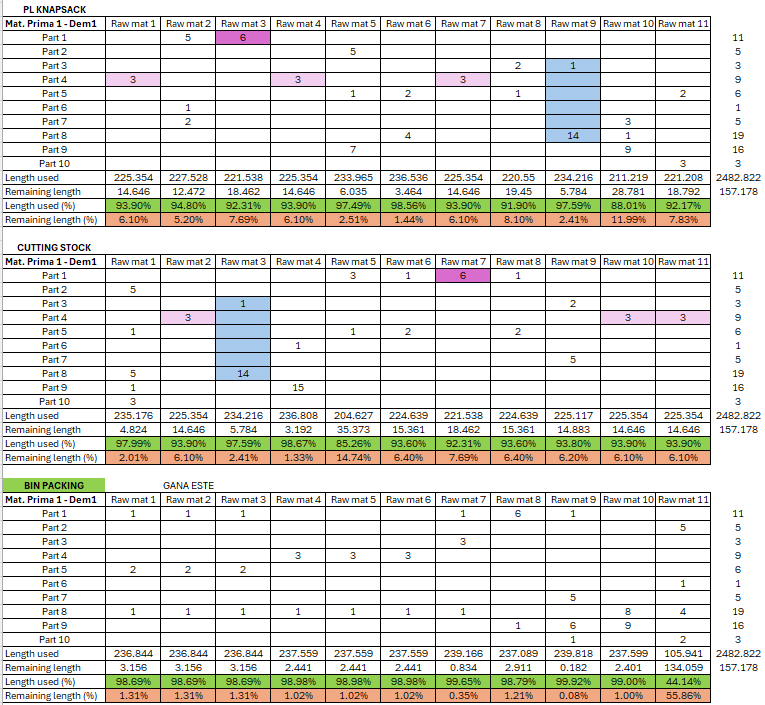

* Para el caso de la **materia prima 1** y la **demanda diaria 1**, observamos que **BIN PACKING** arroja el mejor resultado pues optimiza claramente el material cortado en las primeras 10 materias primas y en la última lo minimiza, lo cual es lo que estamos buscando (para tener disponible la mayor longitud posible para usarlo para la demanda del día siguiente).

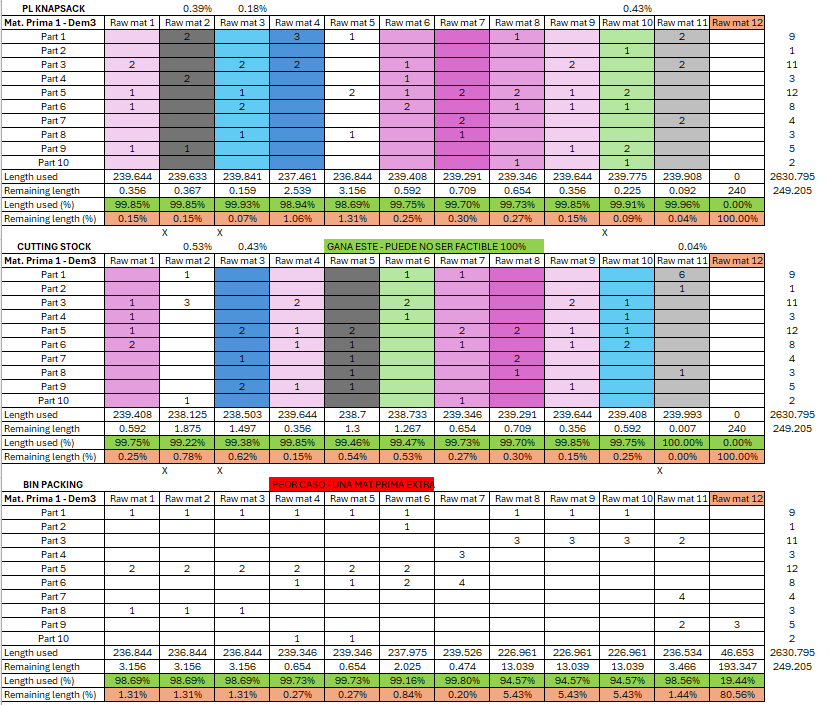

* Para el caso de la **materia prima 1** y la **demanda diaria 13**, observamos que **CUTTING STOCK** arroja el mejor resultado pues optimiza claramente el material cortado en las primeras 11 materias primas y no utiliza una 12ava materia prima como lo hace BIN PACKING. Aquí solo tenemos que tener cuidado porque propone aprovechar el 100% de la materia prima y en un escenario más realista, esto puede no ser factible. Se revisará si se considera como restricción más adelante.

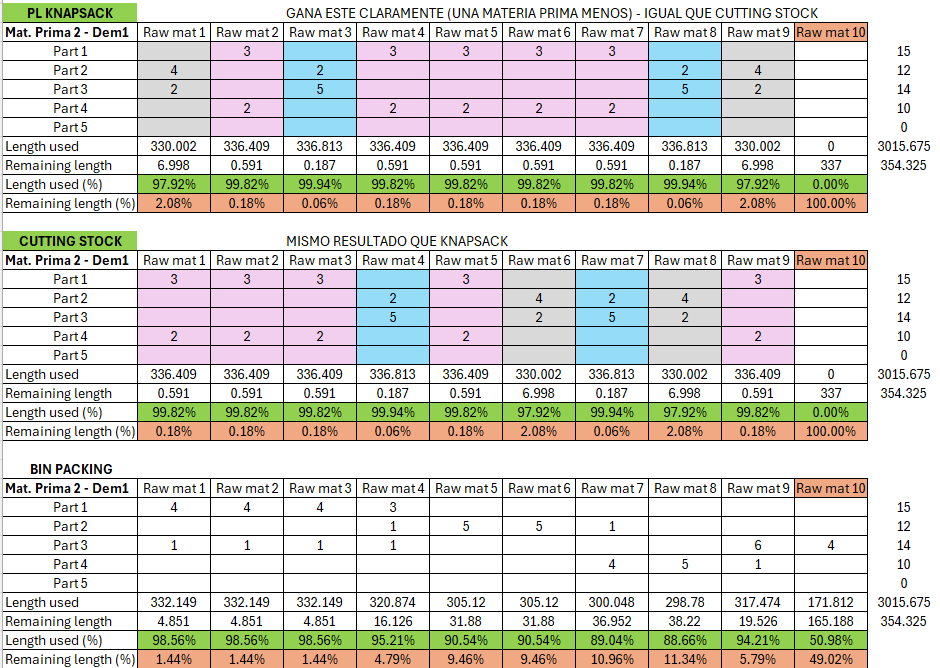

* Para el caso de la **materia prima 2** y la **demanda diaria 1**, observamos que **LP KNAPSACK y CUTTING STOCK** arrojan el mismo resultado. El cual consideramos mejor que BIN PACKING, pues utilizan una materia prima menos, es decir, cortan toda la demanda en sólo 9 tubos de materia prima.

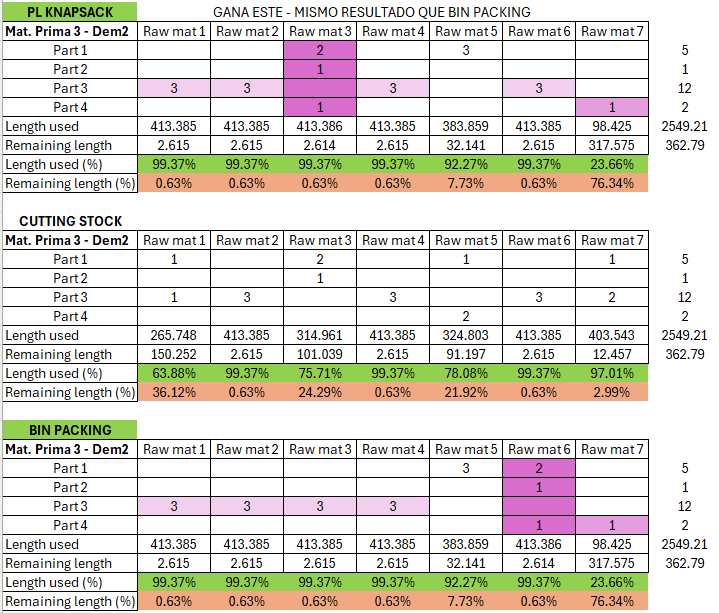

* Para el caso de la **materia prima 3** y la **demanda diaria 2**, observamos que **LP KNAPSACK y BIN PACKING** arrojan el mismo resultado. El cual consideramos mejor que CUTTING STOCK, pues optimiza claramente el material cortado en las primeras 6 materias primas y la última los minimiza, lo cual es lo que estamos buscando (para tener disponible la mayor longitud posible para usarlo para la demanda del día siguiente).

*El próximo paso será seguir explorando estos escenarios y definir el mejor para atender las necesidades de la planta de John Deere para concluir con un modelo de optimización final.*

# Bibliografía

Dyckhoff, H., & Finke, U. (1992). Cutting and packing in production and transportation. Berlin: Springer-Verlag.

Hernández, J. C. (2007). Problema de la mochila (Knaspack problem). Boletín Científico :: UAEH, 6(1), 1-10. https://www.uaeh.edu.mx/scige/boletin/tlahuelilpan/n6/e2.html

 Lodi, A., & Wolsey, L. A. (2008). Integer programming approaches to bin packing problems. In Discrete optimization (pp. 267-303). Berlin: Springer-Verlag.

López-Camacho, E., Ochoa, G., Terashima-Marín, H., & Burke, E. K. (2013). An effective heuristic for the two-dimensional irregular bin packing problem. Annals of Operations Research, 206(1), 241–264. https://doi.org/10.1007/s10479-013-1341-4

 López, R. A., & Coello Coello, C. A. (2017). Algoritmo genético para el problema logístico de asignación de la mochila (Knapsack Problem). Research in Computing Science, 137, 1-14. https://rcs.cic.ipn.mx/2017_137/Algoritmo%20genetico%20para%20el%20problema%20logistico%20de%20asignacion%20de%20la%20mochila%20_Knapsack%20Problem_.pdf

Munien, C. & Ezugwu, A. (2021). Metaheuristic algorithms for one-dimensional bin-packing problems: A survey of recent advances and applications. Journal of Intelligent Systems, 30(1), 636-663. https://doi.org/10.1515/jisys-2020-0117

Potosme, R. A. L. (2017). Algunos problemas clásicos de Optimización Combinatoria: una propuesta metodológica. Repositorio Institucional UNAN-Managua. https://repositorio.unan.edu.ni/8853/1/Art%C3%ADculo-Rudy%20Alberto%20L%C3%B3pez%20Potosme.pdf